In [2]:
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

california_housing = fetch_california_housing(as_frame=True)
target_column = "MedHouseVal"
target = california_housing.frame[target_column]
data = california_housing.frame.drop(columns=[target_column, "AveOccup", "Population", "HouseAge", ])

In [16]:
print(
    f"The dataset contains {california_housing.frame.shape[0]} samples and "
    f"{california_housing.frame.shape[1]} columns"
)
print(f"The dataset contains {california_housing.frame.shape[1] - 1} features.")

The dataset contains 20640 samples and 9 columns
The dataset contains 8 features.


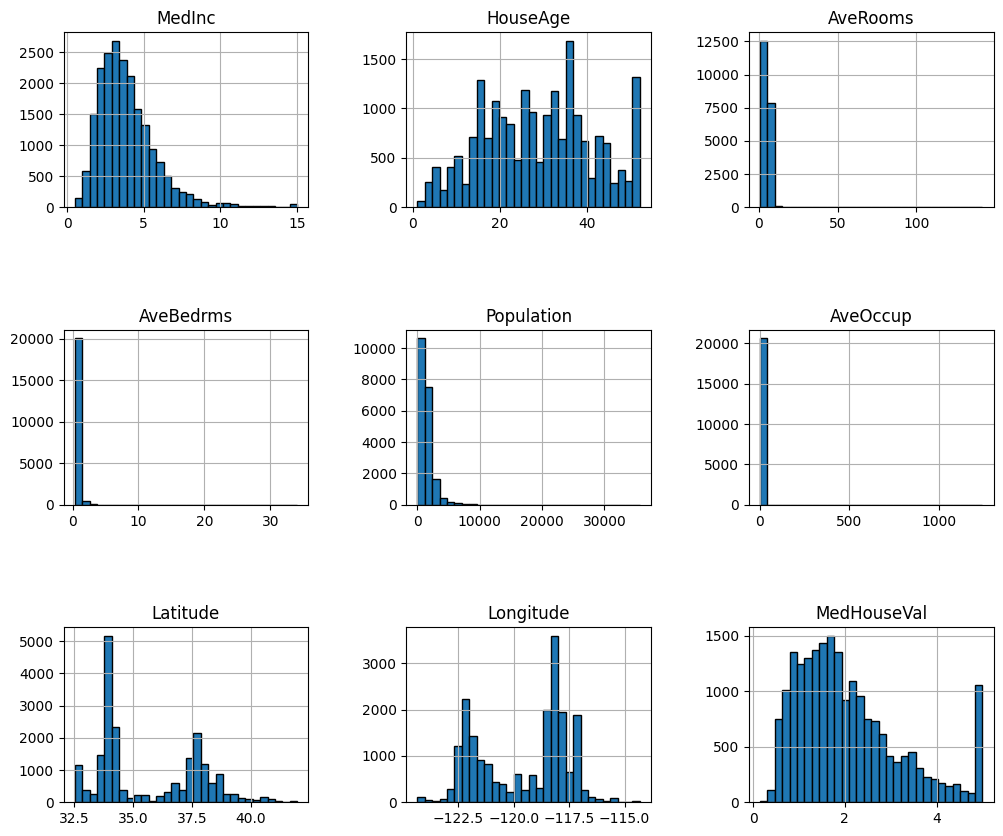

In [23]:
_ = california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [27]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


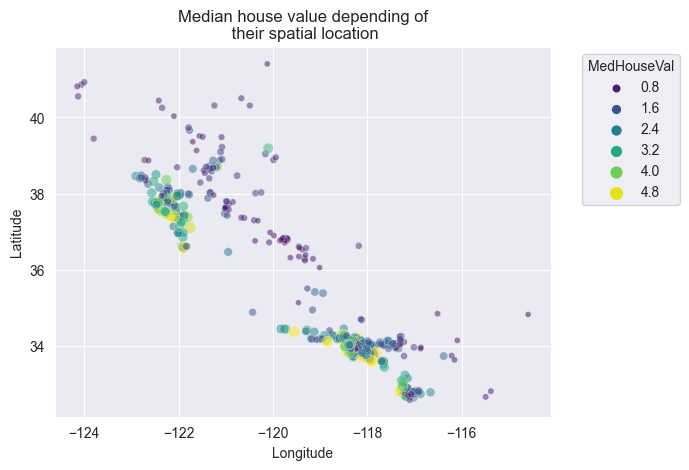

In [4]:
rng = np.random.RandomState(42)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)

sns.scatterplot(data=california_housing.frame.iloc[indices],
                x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

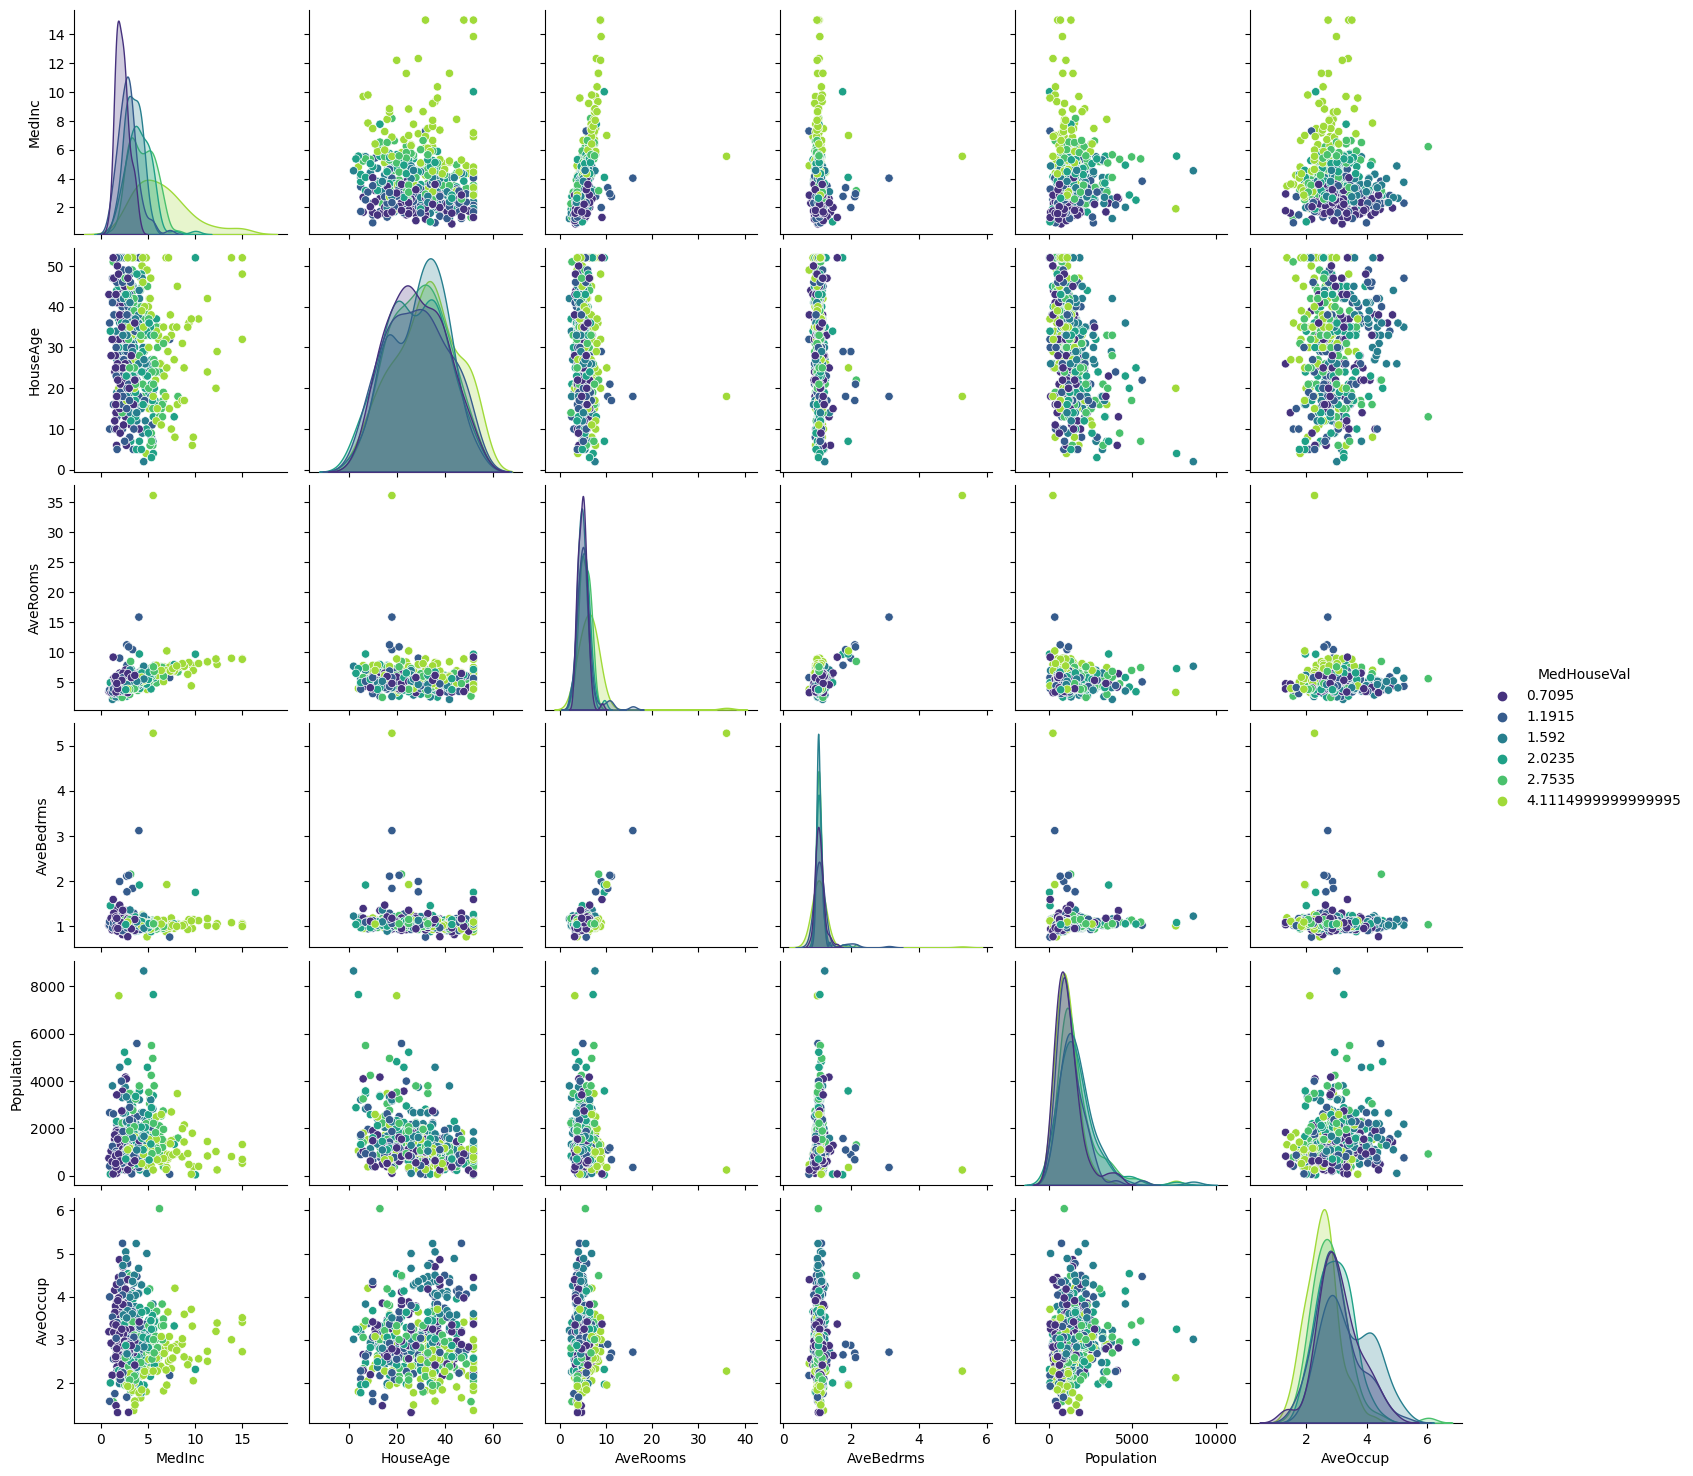

In [39]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

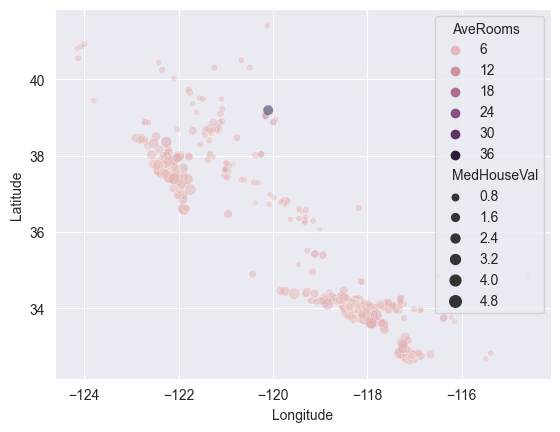

In [29]:
t = sns.scatterplot(data=california_housing.frame.iloc[indices],
                  x="Longitude", y="Latitude",
                  size="MedHouseVal", hue="AveRooms", legend="brief",
                  alpha=0.5)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25, random_state=42)

model = DecisionTreeRegressor()
_ = model.fit(data_train, target_train)

In [10]:
from sklearn.metrics import mean_absolute_error

target_predicted = model.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"On average, our regressor makes an error of {score:.2f}")

On average, our regressor makes an error of 0.43


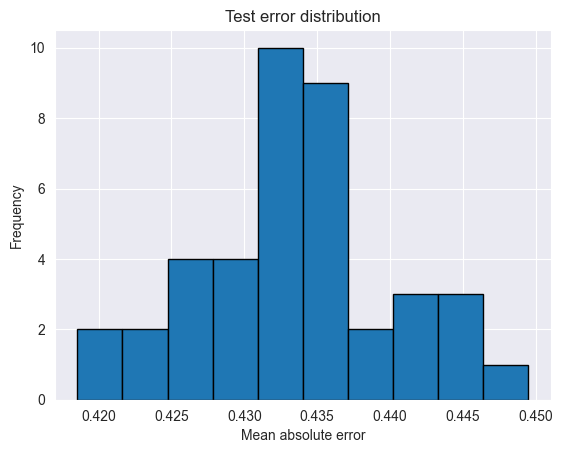

In [14]:
from sklearn.model_selection import ShuffleSplit, cross_validate

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    model, data, target, cv=cv, scoring="neg_mean_absolute_error")
cv_results = pd.DataFrame(cv_results)
cv_results["test_error"] = -cv_results["test_score"]

cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error")
_ = plt.title("Test error distribution")